## Neural network working

in this lab i will try to implement the neural network i have learned in this course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("deeplearning.mplstyle")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
coffee_df = pd.read_csv('coffe_df.csv')

In [3]:
coffee_df = coffee_df.drop("Unnamed: 0" ,axis = 1)

In [4]:
coffee_df

,0,1,y
0,185.317638,12.693965,1.0
1,259.920475,11.867664,0.0
2,231.013571,14.414242,0.0
3,175.366645,11.720587,0.0
4,187.120865,14.129732,1.0
...,...,...,...
195,223.781833,15.299167,0.0
196,266.627673,12.480510,0.0
197,273.683982,13.097562,0.0
198,220.610006,12.799891,1.0


In [5]:
y = np.array(coffee_df.y)

In [6]:
x = coffee_df[["0",'1']]

In [7]:
x = x.to_numpy()

In [8]:
x.shape

(200, 2)

In [9]:
x_pos = x[y == 1]

In [10]:
x_pos.shape

(43, 2)

In [11]:
x_neg = x [y ==0]
x_neg.shape

(157, 2)

In [12]:
plt.style.use("./deeplearning.mplstyle")

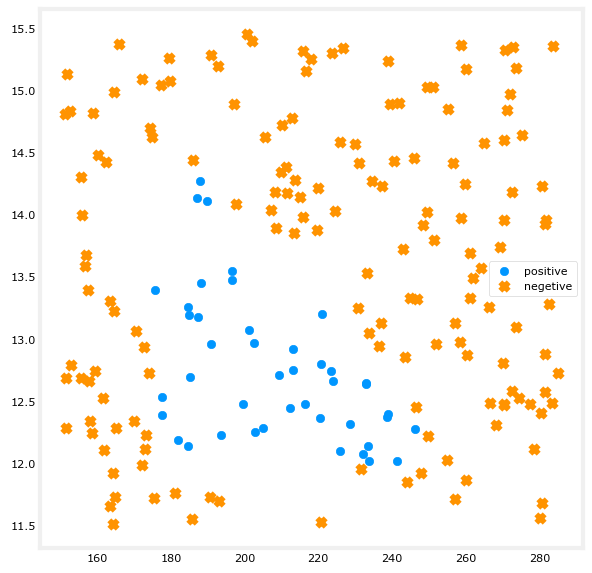

In [13]:
fig, ax = plt.subplots(figsize = (7,7))

ax.scatter( x = x_pos[:,0] , y = x_pos [:,1], marker='o', label = "positive" )
ax.scatter( x = x_neg[:,0] , y = x_neg [:,1], marker ='x', label = 'negetive')
ax.legend()

Normalize the data frame

In [14]:
temperatire_max = max(x[0])
temperatire_min = min(x[0])
print ("max temeperature point is ",temperatire_max, " and minimun temperature point is ", temperatire_min)
norm_tenser = tf.keras.layers.Normalization()
norm_tenser.adapt(x)
x_norm = norm_tenser(x)
print ('normalize max temp = ' , np.max(x_norm[:,0]), ' and min temperature ',np.min(x_norm[:,0]))



max temeperature point is  185.31763812365773  and minimun temperature point is  12.693964573656494
normalize max temp =  1.6597538  and min temperature  -1.6852188


In [15]:
x_norm.shape, x.shape, y.reshape((200,1))

(TensorShape([200, 2]),
 (200, 2),
 array([[1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],

In [16]:
xt = np.tile(x_norm,(1000,1))
yt = np.tile(y.reshape((200,1)),(1000,1))
print (f'the shape of new X {xt.shape} and new y is {yt.shape}')

the shape of new X (200000, 2) and new y is (200000, 1)


Creating my owm neural network
using sigmoid function

In [17]:
def sigmoid (z):
    return 1/(1+np.exp(-z))

sigmoid(0)

0.5

In [18]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [19]:
x_norm[0]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.83455515, -0.6528792 ], dtype=float32)>

In [20]:
def dense(x: np.array([]),w,b):
    u = w.shape[1]
    #print('w.shape ', w.shape, " x.shape ", x.shape, " x ", x)
    out = np.zeros(u)
    for i in range(u):
        z = np.dot( x ,w[:,i]  ) + b[i]
        #print (z)
        out[i] = sigmoid(z)
    return out

dense(np.array(x_norm[0]),  W1_tmp, b1_tmp) 

array([9.09463285e-02, 8.63768551e-03, 4.74596771e-08])

In [21]:
def sequence (x, w1,b1,w2,b2):
    a1 = dense (x, w1, b1)
    a2 = dense (a1, w2, b2)
    return a2

In [22]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = sequence(X[i], W1, b1, W2, b2)
    return(p)

In [23]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_tenser(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

In [24]:
predictions

array([[9.71932366e-01],
       [3.28978619e-08]])

Creating nural network from tenser flow

In [25]:
tf.random.set_seed(1234)
model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape= (2,)),
        Dense(3, activation = 'sigmoid', name = 'layer1'),
        Dense(1, activation = 'sigmoid', name = 'layer2')
        
    ]
    
)


In [26]:
# model insight function 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [27]:
#model in very basic steps
activation_fuc =  'sigmoid'

layer1 = Dense (5, activation= activation_fuc, name = "layer1")
layer2 = Dense (4, activation= activation_fuc, name = 'layer2')
layer3 = Dense (1, activation= activation_fuc, name = 'output')

model1 = Sequential ([
                        tf.keras.Input(shape = (2,)),
                        layer1, layer2, layer3
])



In [28]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 15        
                                                                 
 layer2 (Dense)              (None, 4)                 24        
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [29]:
# getting the weights of layers form the neural network

w1, b1 = model.get_layer("layer1").get_weights()
w2, b2 = model.get_layer('layer2').get_weights()

In [30]:
print(f'shape of w1 = {w1.shape} \nvalues of w1 = {w1} ')
print(f'values of b1 = {b1}')
print(f''' shape of w2 = {w2.shape}
Values of w1 = {w1}
values of b1 = {b1}

''')

shape of w1 = (2, 3) 
values of w1 = [[ 0.00873101 -0.523542    0.3221712 ]
 [-0.52750504 -0.1656149  -0.9579146 ]] 
values of b1 = [0. 0. 0.]
 shape of w2 = (3, 1)
Values of w1 = [[ 0.00873101 -0.523542    0.3221712 ]
 [-0.52750504 -0.1656149  -0.9579146 ]]
values of b1 = [0. 0. 0.]




In [31]:
#multi layer model creating using for loop

dens = np.random.randint(low = 1 , high = 25, size = 100 )
dense_arr = np.array([])
for i in range(len(dens - 1 )):
    dense_arr = np.append(dense_arr, Dense(dens[i], activation = activation_fuc, name = f'layer{i}' ) )
dense_arr = np.append(dense_arr, Dense(1, activation = activation_fuc, name = f'output' ))
den_list = list (dense_arr)

In [42]:
dense_arr

array([<keras.layers.core.dense.Dense object at 0x000002193F62CB20>,
      dtype=object)

In [32]:
model3 = Sequential()
model3.add (tf.keras.Input (shape= (2,)),)
for i in range (len (dense_arr)):
    model3.add(
            
            dense_arr[i]
    )

In [33]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer0 (Dense)              (None, 7)                 21        
                                                                 
 layer1 (Dense)              (None, 14)                112       
                                                                 
 layer2 (Dense)              (None, 10)                150       
                                                                 
 layer3 (Dense)              (None, 17)                187       
                                                                 
 layer4 (Dense)              (None, 21)                378       
                                                                 
 layer5 (Dense)              (None, 4)                 88        
                                                                 
 layer6 (Dense)              (None, 4)                

                                                                 
 layer61 (Dense)             (None, 19)                76        
                                                                 
 layer62 (Dense)             (None, 14)                280       
                                                                 
 layer63 (Dense)             (None, 1)                 15        
                                                                 
 layer64 (Dense)             (None, 20)                40        
                                                                 
 layer65 (Dense)             (None, 4)                 84        
                                                                 
 layer66 (Dense)             (None, 11)                55        
                                                                 
 layer67 (Dense)             (None, 16)                192       
                                                                 
 layer68 (

In [34]:
model.compile(
            loss= tf.keras.losses.BinaryCrossentropy(),
            optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
)



In [35]:
model.fit(
    xt, yt,
    epochs = 10
)

Epoch 1/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.1848
Epoch 2/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.1114
Epoch 3/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.0302
Epoch 4/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.0150
Epoch 5/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.0097
Epoch 6/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.0067
Epoch 7/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.0046
Epoch 8/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0032
Epoch 9/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0022
Epoch 10/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0016


In [36]:
model1.compile(
            loss= tf.keras.losses.BinaryCrossentropy(),
            optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
)

model1.fit(
    xt, yt,
    epochs = 10
)

Epoch 1/10
6250/6250 [==============================] - 17s 3ms/step - loss: 0.1548
Epoch 2/10
6250/6250 [==============================] - 16s 3ms/step - loss: 0.0344
Epoch 3/10
6250/6250 [==============================] - 17s 3ms/step - loss: 0.0070
Epoch 4/10
6250/6250 [==============================] - 17s 3ms/step - loss: 0.0021
Epoch 5/10
6250/6250 [==============================] - 17s 3ms/step - loss: 7.8280e-04
Epoch 6/10
6250/6250 [==============================] - 16s 3ms/step - loss: 7.0968e-04
Epoch 7/10
6250/6250 [==============================] - 16s 3ms/step - loss: 4.1321e-04
Epoch 8/10
6250/6250 [==============================] - 17s 3ms/step - loss: 4.0307e-04
Epoch 9/10
6250/6250 [==============================] - 16s 3ms/step - loss: 6.3966e-04
Epoch 10/10
6250/6250 [==============================] - 16s 3ms/step - loss: 6.9334e-04


### I have seen  that increasing the hidden layer will increase the perfomance of th \nural network. but a huge number of hidden layer also decrease the perfomance significantely. Model3 consumes the most of the time and error rate as about 50%

In [37]:
model.get_weights()

[array([[-10.9453    ,   0.18017055,  14.513067  ],
        [ -0.30194202,  10.356496  ,  12.026793  ]], dtype=float32),
 array([-11.776387 ,  12.503473 ,   1.9591713], dtype=float32),
 array([[-54.865414],
        [ 44.84069 ],
        [-47.07325 ]], dtype=float32),
 array([-14.032478], dtype=float32)]

In [38]:
model1.get_weights()

[array([[ 7.6132503e+00, -1.7211590e+01, -6.2073884e+00, -1.3415807e+01,
         -7.8225769e-02],
        [ 8.2970276e+00,  7.9867764e+00,  6.8579600e-03, -1.0782178e+01,
         -5.0791736e+00]], dtype=float32),
 array([-0.6599862,  1.3123714, -6.78107  , -1.1143057, -6.99571  ],
       dtype=float32),
 array([[  9.118935 ,  -6.3230534,   8.353688 ,  -8.050051 ],
        [ -3.3763788,  -3.7539809,  -2.6208842,   2.5080683],
        [ 13.965594 ,  14.588646 ,  12.867593 , -11.615078 ],
        [ -5.266192 ,  -3.321865 ,  -5.931822 ,   4.929438 ],
        [  9.513583 ,   9.2253275,  11.148147 ,  -9.543058 ]],
       dtype=float32),
 array([ 1.2567796 , -0.49501458,  1.2907895 , -0.8747523 ], dtype=float32),
 array([[-20.279251],
        [-15.343508],
        [-21.17028 ],
        [ 22.41975 ]], dtype=float32),
 array([9.422396], dtype=float32)]

In [39]:
model3.get_weights()

[array([[ 0.24340701,  0.0252015 , -0.37054035, -0.05305481,  0.73054814,
         -0.01303285,  0.7585803 ],
        [ 0.81411815, -0.39019287, -0.76878643,  0.26102245,  0.18079185,
         -0.28652966, -0.31628656]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.29311666,  0.17895943, -0.01603323, -0.09505934, -0.44569787,
          0.32364786,  0.01510894, -0.04614058,  0.06390965,  0.05320305,
         -0.1243169 , -0.18901175, -0.24469936,  0.22898448],
        [ 0.26290214,  0.20883417,  0.15128398,  0.03241247, -0.08471212,
         -0.32208788, -0.19648102, -0.0489881 , -0.28342345,  0.22718364,
         -0.4921721 ,  0.08196884,  0.40176523,  0.47625345],
        [-0.2445955 , -0.51250595, -0.11889142,  0.03943187, -0.3536808 ,
          0.17168069,  0.3640285 ,  0.2974254 , -0.25086594,  0.05890983,
          0.3994218 ,  0.3090831 ,  0.3994422 , -0.39703333],
        [-0.3974167 ,  0.13909626,  0.34922153,  0.06179148, -0.13940492,
      

In [41]:
# hyper parameter provided in lab
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])